# Introduction to Data Science and Data Analytics

Dataset: [Shopee Code League 2020](https://www.kaggle.com/davydev/shopee-code-league-20). Find the folder "_DA_Marketing_Analytics"

Topics covered here

- Select data
- Filter data
- Understand data via visualization
- Merge data

In [4]:
!unzip data.zip

Archive:  data.zip
  inflating: sample_submission_0_1.csv  
  inflating: test.csv                
  inflating: train.csv               
  inflating: users.csv               


There should be 3 files:

- train.csv
- users.csv
- test.csv

Tips on using Jupyter Notebook

- Ctrl + Enter: run current cell. stay on current cell
- Shift + Enter: run current cell. jump to the next cell
- Ctrl + /: comment out or remove comment for selected lines

## Read csv

Pandas can read many file formats. Most of the time for Data Science and Analytics, you will be given a csv file.

In [5]:
import pandas as pd

df = pd.read_csv("train.csv")
df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


From here you can see there are 18 columns and 73,539 rows

- Row: each row is a **sample** of the data. Sometimes known as **data point**
- Column: each column is a **feature**

First we want to get familiar with what the data is like. Some trick to do this is using `.sample()`, so every time you run this function again, it shows you different subset of the whole dataset.

In [ ]:
df.sample(10)

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
50561,1,2019-08-19 00:00:00+08:00,38535,37,55,690,Never checkout,0,0,1,0,0,0,0,0,0,0,50561
41756,5,2019-08-14 00:00:00+08:00,11670,28,Never open,75,205,0,0,0,0,1,1,0,0,0,0,41756
41495,1,2019-08-13 00:00:00+08:00,112358,32,4,2,37,2,5,10,2,4,37,1,1,7,0,41495
42454,6,2019-08-14 00:00:00+08:00,56749,50,11,5,152,0,2,2,0,1,3,0,0,0,0,42454
15063,3,2019-07-25 00:00:00+08:00,104173,53,20,8,10,0,2,2,10,24,24,2,15,15,0,15063
58326,6,2019-08-24 00:00:00+08:00,86085,35,19,1,2,0,2,4,8,38,64,2,3,5,0,58326
22848,1,2019-07-30 00:00:00+08:00,103507,60,85,3,Never checkout,0,0,0,22,74,168,0,0,0,0,22848
55961,1,2019-08-22 00:00:00+08:00,99625,47,17,8,29,0,8,11,4,21,61,0,4,12,0,55961
3474,4,2019-07-17 00:00:00+08:00,87501,32,Never open,217,Never checkout,0,0,0,0,0,0,0,0,0,0,3474
6612,2,2019-07-20 00:00:00+08:00,73724,40,1,1,86,5,12,26,4,12,22,0,1,1,1,6612


After running the cell above several times, you see some patterns

- `country_code`: there are only several values
- `grass_date`: a timestamp
- `user_id`: some unique number. Question: Are there duplicate user_id?
- `subject_line_length`: integer values
- `last_(something)_day`: integer values, but sometimes there are `Never open/checkout` → we will need to handle this later
- `(something)_count_last_xx_days`: integer values. Seem okay

## Select data

There are 3 main ways to select data. Let's go through each of them

- `.iloc[]`: integer-location. count from top to bottom (for index. and count from left to right for columns)
- `.loc[]`: index location. look at the index column (and column names)
- `[]`: indexing operator

### `.iloc[]`

This is like indexing a list, where item in this case is a row (data sample).

This is to **select rows**

In [ ]:
df.iloc[10]             # select row 10 from top (11th row)
df.iloc[:10]            # select the first 10 rows
df.iloc[2:12:4]         # select row 2 (inclusive) to row 12 (exclusive), and only select 1 every 4 rows
df.iloc[[0,5,2,455]]    # select rows with a list

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
5,4,2019-07-16 00:00:00+08:00,246,44,5,8,70,3,7,13,6,18,45,0,0,7,0,5
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
455,4,2019-07-16 00:00:00+08:00,26212,44,25,3,3,0,1,2,22,54,101,4,4,7,0,455


You can also use `.iloc[]` to **select columns**

In [ ]:
df.iloc[:10, 0]         # select first 10 rows, column 0 (1st column)
df.iloc[:10, :5]        # select first 10 rows, first 5 columns

,country_code,grass_date,user_id,subject_line_length,last_open_day
0,4,2019-07-16 00:00:00+08:00,43,44,19
1,4,2019-07-16 00:00:00+08:00,102,44,9
2,6,2019-07-16 00:00:00+08:00,177,49,14
3,1,2019-07-16 00:00:00+08:00,184,49,49
4,6,2019-07-16 00:00:00+08:00,221,49,227
5,4,2019-07-16 00:00:00+08:00,246,44,5
6,5,2019-07-16 00:00:00+08:00,258,43,13
7,6,2019-07-16 00:00:00+08:00,288,49,163
8,1,2019-07-16 00:00:00+08:00,350,49,7
9,4,2019-07-16 00:00:00+08:00,417,44,7


If you want to select by columns only, you have to select all rows

In [ ]:
df.iloc[:, :10]         # select all rows, first 10 colummns

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0
...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4


### `.loc[]`

`.loc[]` is similar to above, but you will index the data using **index** column and **column names**.

In this case, since our index column is the same as counting from top to bottom, `loc[]` and `iloc[]` are the same. To spice things up, we will change the index column

In [ ]:
df = df.set_index("user_id")
df

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
user_id,,,,,,,,,,,,,,,,,
43,4,2019-07-16 00:00:00+08:00,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
102,4,2019-07-16 00:00:00+08:00,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
177,6,2019-07-16 00:00:00+08:00,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
184,1,2019-07-16 00:00:00+08:00,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
221,6,2019-07-16 00:00:00+08:00,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127613,6,2019-09-02 00:00:00+08:00,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
127620,2,2019-09-02 00:00:00+08:00,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
127696,2,2019-09-02 00:00:00+08:00,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536


Now the index is `user_id`. Note that index does **not need to be unique** for pandas DataFrame.

If we use `.loc[0]`, it will throw error, because there is no `user_id` = 0.

In [ ]:
df.loc[0]           # will thow error

KeyError: ignored

Only indices exist in `user_id` can be used for `loc[]`

In [ ]:
df.loc[[43, 102]]

,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
user_id,,,,,,,,,,,,,,,,,
43,4,2019-07-16 00:00:00+08:00,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
102,4,2019-07-16 00:00:00+08:00,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1


We can use `.loc[]` to **select columns** also. It must be a column name

In [ ]:
df.loc[[43, 102], ["country_code", "subject_line_length"]]

,country_code,subject_line_length
user_id,,
43,4,44
102,4,44


### `[]`

By default, indexing operator will **select column names**

In [ ]:
df["country_code"]
df[["country_code", "last_checkout_day"]]

,country_code,last_checkout_day
user_id,,
43,4,18
102,4,8
177,6,5
184,1,53
221,6,221
...,...,...
127613,6,279
127620,2,51
127696,2,Never checkout


Let's reset index to normal

In [ ]:
df = df.reset_index()
df

,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,43,4,2019-07-16 00:00:00+08:00,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,102,4,2019-07-16 00:00:00+08:00,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,177,6,2019-07-16 00:00:00+08:00,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,184,1,2019-07-16 00:00:00+08:00,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,221,6,2019-07-16 00:00:00+08:00,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,127613,6,2019-09-02 00:00:00+08:00,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,127620,2,2019-09-02 00:00:00+08:00,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,127696,2,2019-09-02 00:00:00+08:00,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,127807,2,2019-09-02 00:00:00+08:00,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


## Filter data

Easiest way to filter data is to use **boolean mask**

Boolean mask is a list of values, and each value can either be True of False. If it is true, we will select that data

In [ ]:
df["subject_line_length"] > 45              # this is a boolean mask

0        False
1        False
2         True
3         True
4         True
         ...  
73534    False
73535    False
73536    False
73537    False
73538    False
Name: subject_line_length, Length: 73539, dtype: bool

We will use this boolean mask with the indexing operator `[]`

In [ ]:
df[df["subject_line_length"] > 20]          # select all rows whose subject line length > 20

,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,43,4,2019-07-16 00:00:00+08:00,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,102,4,2019-07-16 00:00:00+08:00,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,177,6,2019-07-16 00:00:00+08:00,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,184,1,2019-07-16 00:00:00+08:00,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,221,6,2019-07-16 00:00:00+08:00,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,127613,6,2019-09-02 00:00:00+08:00,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,127620,2,2019-09-02 00:00:00+08:00,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,127696,2,2019-09-02 00:00:00+08:00,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,127807,2,2019-09-02 00:00:00+08:00,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


As you can see above, when the thing inside `[]` is a boolean mask, it will **select the rows**. This is different from above, where normally it will **select the columns** instead. Just a thing to take note

Since we are using boolean mask to filter data, we can **combine multiple conditions**

In [ ]:
(df["subject_line_length"] > 20)            # this is a boolean mask
(df["subject_line_length"] < 50)            # this is another boolean mask

# we can apply operations on 2 boolean masks
# & is LOGICAL AND
# | is LOGICAL OR

df[(df["subject_line_length"] > 20) & (df["subject_line_length"] < 50)]         # select rows whose subject line length is between 20 and 50
df[(df["subject_line_length"] < 20) | (df["subject_line_length"] > 50)]         # select rows whose subject line length < 20 or > 50

,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
26,1217,1,2019-07-16 00:00:00+08:00,64,70,1396,Never checkout,0,0,0,0,0,0,0,0,0,0,26
41,2041,1,2019-07-16 00:00:00+08:00,58,20,49,420,0,1,1,0,0,1,0,0,0,0,41
45,2156,1,2019-07-16 00:00:00+08:00,64,2,1,50,7,19,20,2,3,13,0,0,1,1,45
52,2515,1,2019-07-16 00:00:00+08:00,58,70,114,123,0,0,0,0,0,0,0,0,0,0,52
62,2913,1,2019-07-16 00:00:00+08:00,58,8,25,Never checkout,1,1,1,1,2,5,0,0,0,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73379,122373,3,2019-09-02 00:00:00+08:00,64,Never open,3,9,0,0,0,8,10,10,4,4,4,0,73379
73473,123576,3,2019-09-02 00:00:00+08:00,64,Never open,2,14,0,0,0,7,10,10,0,2,2,0,73473
73491,124179,3,2019-09-02 00:00:00+08:00,64,Never open,8,8,0,0,0,9,10,10,4,5,5,0,73491
73511,127077,5,2019-09-02 00:00:00+08:00,10,96,2,7,0,0,0,0,0,0,0,0,0,0,73511


Boolean mask can be built for other data types also. For example, if a column contains text data (string data type), you can filter rows with certain criteria with those text

Many of the built-in Python functions working on text can be accessed from `.str` in the DataFrame / Series

In [ ]:
df[df["last_open_day"].str.startswith("Never")]

,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
14,635,2,2019-07-16 00:00:00+08:00,36,Never open,44,57,0,0,0,0,0,6,0,0,1,0,14
23,1162,2,2019-07-16 00:00:00+08:00,43,Never open,382,16,0,0,0,0,0,0,0,0,0,0,23
24,1165,2,2019-07-16 00:00:00+08:00,36,Never open,135,468,0,0,0,0,0,0,0,0,0,0,24
71,3566,2,2019-07-16 00:00:00+08:00,43,Never open,327,499,0,0,0,0,0,0,0,0,0,0,71
89,4648,2,2019-07-16 00:00:00+08:00,46,Never open,1,76,0,0,0,2,2,5,0,0,0,0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73487,124125,3,2019-09-02 00:00:00+08:00,49,Never open,11,Never checkout,0,0,0,3,5,5,0,0,0,0,73487
73490,124176,3,2019-09-02 00:00:00+08:00,49,Never open,11,Never checkout,0,0,0,0,1,1,0,0,0,0,73490
73491,124179,3,2019-09-02 00:00:00+08:00,64,Never open,8,8,0,0,0,9,10,10,4,5,5,0,73491
73492,124187,2,2019-09-02 00:00:00+08:00,38,Never open,2,10,0,0,0,15,16,16,3,3,3,0,73492


### Use filtering to clean up data

As seen above, `last_open_day` column has some values `Never open`. One logical way to solve this is to replace them with the maximum value

In [13]:
int_last_checkout_day = df[df["last_checkout_day"] != "Never checkout"]["last_checkout_day"]                # select all last_checkout_day which is not Never checkout
max_last_checkout_day = int_last_checkout_day.astype(int).max()                                             # convert them to integer (from string) and find the max value
max_last_checkout_day

1445

In [14]:
df[df["last_checkout_day"] == "Never checkout"]["last_checkout_day"] = max_last_checkout_day                # assign "Never checkout" values with the max above
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


What happeneds? It didn't work. Turns out that when we were quickly viewing the data by **chaining** the operations (`df[boolean_mask]` then `[column_name]`), pandas returns a **copy** of the DataFrame instead of the actual **location of data** (called "view" as above). Luckily pandas informed us this, so we just need to change to using `loc[]`

Note: this concept is like pointer/address and value if you know other programming languages like C and Java

In [15]:
df.loc[df["last_checkout_day"] == "Never checkout", "last_checkout_day"] = max_last_checkout_day                # assign "Never checkout" values with the max above
df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,1445,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,0,0,0,0,0,0,1,73537


We filled in the data correctly. One last thing to do is to cast the whole column to integers (since originally they are read as string by Pandas)

In [16]:
first_val = df.loc[0, "last_checkout_day"]
print(first_val, type(first_val))

18 <class 'str'>


In [17]:
df["last_checkout_day"] = df["last_checkout_day"].astype(int)
df["last_checkout_day"].dtype

dtype('int64')

## Understand data via visualization

For everything about visualization using Pandas, see [Pandas Docs - Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


### Single variable

We first want to understand how each variable **distributes**

Generally data is either **categorial** or **numerical**. We will examin the types of visualization can be used for each data type


#### Categorical

In our dataset, there are only 2 categorical columns: `country_code` and `open_flag`. One standard visualization is to use **frequency count**

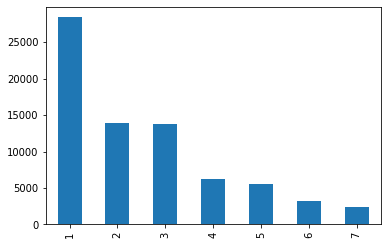

In [ ]:
df["country_code"].value_counts().plot.bar()

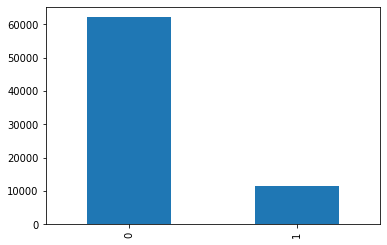

In [ ]:
df["open_flag"].value_counts().plot.bar()

We can see that our data are skewed towards certain categories, such as `country_code=1` and `open_flag=0`. This will be important when we build ML model later.

#### Numerical

For numerical data, my personal favourite is **histogram**. It clearly shows the **distribution** of the data

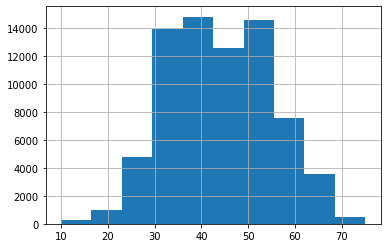

In [ ]:
df["subject_line_length"].hist()

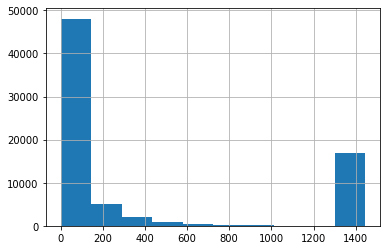

In [ ]:
df["last_checkout_day"].hist()

Some observations

- `subject_line_length` follows a nice bell-shape curve
- `last_checkout_day`: obviously not a bell-shape, skewed towards zero. there is a peak at 1400 because that is where we replace Never checkout

In `last_checkout_day` histogram, the **magnitude** of each bin is drastically different. One trick we can do is to use **log scale**

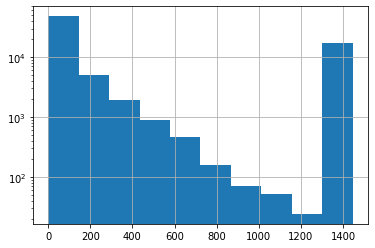

In [ ]:
import matplotlib.pyplot as plt

df["last_checkout_day"].hist()
plt.yscale("log")

Ignoring the last bin, we can see that this is an almost-perfect straight line, suggesting some exponential decay relationship. Converting to log scale indeed reveals insights into the data

### Two variables

When visualizing two variables together, we are concerned with their **relationship**, or how one variable affects another. Since we have 2 basic data types (categorical and numerical), there are 3 combinations

- Numerical - Numerical
- Numerical - Categorical
- Categorical - Categorical

#### Numerical - Numerical

One standard plot is **scatter plot**. It clearly shows the relationship between two variables

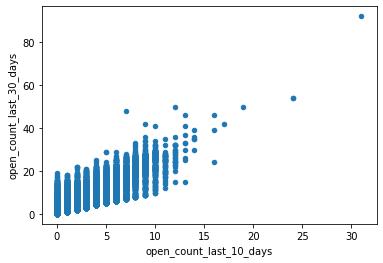

In [ ]:
df.plot.scatter(x="open_count_last_10_days", y="open_count_last_30_days")

In the above plot, we clearly see a **positive correlation** between the two variables. However, the relationship is not very strong, because the data points spread out over a large area

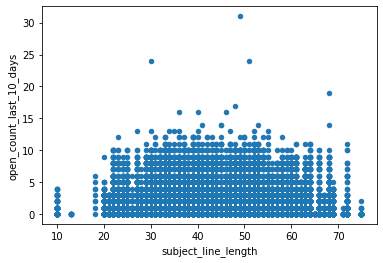

In [ ]:
df.plot.scatter(x="subject_line_length", y="open_count_last_10_days")

This time, there is **no clear correlation** between the two variables. It seems subject line length does not impact how frequent you open your email.

One disadvantage of scatter plot is that if you have **many overlapping data points**, you can't really tell what's going on there. This is especially true for **discrete numerical data** (like the ones we are dealing with here). One way to solve it is to use **density plot**

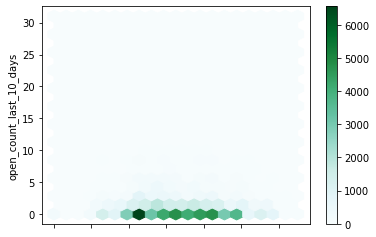

In [ ]:
df.plot.hexbin(x="subject_line_length", y="open_count_last_10_days", gridsize=20)

This plot reveals that actually the data concentrates more towards open count = 0, which is not revealed in the scatter plot. There are also other creative ways to visualize this, such as using scatter plot but change the color if they overlap; add histogram / kde plot at the side to visualize each variable separately

#### Numerical - Categorical

Since categorical data generally **does not have an order** (you can't say apple > orange), we won't have positive or negative correlation as we do for numerical - numerical data.

Instead, we are concerned with **is there a difference between different categories**?

The simplest way for this is to look at **the mean**

In [ ]:
df.groupby("open_flag")["subject_line_length"].mean()

open_flag
0    43.932800
1    42.158345
Name: subject_line_length, dtype: float64

Let's me explain how `.groupby()` works

- First I call `.groupby("open_flag")`. This separate the data according to `open_flag`. Since there are 2 values, 0 and 1, we will have 2 groups of `open_flag=0` and `open_flag=1`
- I index with `["subject_line_length"]`. I select only this column
- `.mean()` calculate the mean of subject line length, for both groups

As you can see, the means are not very different.

We can also **compare the distribution** across categories, which will reveal more insights

open_flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: subject_line_length, dtype: object

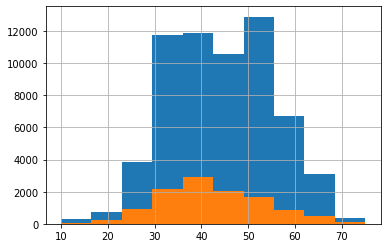

In [ ]:
df.groupby("open_flag")["subject_line_length"].hist()

Since `open_flag=0` has much more samples than `open_flag=1`, this might not be a fair comparison. Instead, we will use **KDE plot**, which is an estimate of probability distribution, so the values are normalized (area under the curve = 1)

open_flag
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: subject_line_length, dtype: object

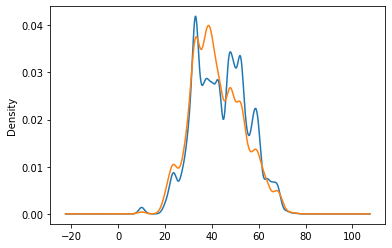

In [ ]:
df.groupby("open_flag")["subject_line_length"].plot.kde()

Still, the distributions are pretty similar, although they have different peaks. We can roughly conclude that among the two categories, there isn't a big difference.

Note: this is a standard problem in Statistics: to test whether two given distributions are the same

One interesting question we can think about. If the two distributions are different, given a new observation, can we tell **which distribution the observation is more likely to belong to**? One way to do so is to use the [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) to calculate distance from a point to a distribution.

When you have many categories, using **box-plot** (box-whisker plot) might be more convenient to compare distribution across categories.

1         AxesSubplot(0.1,0.15;0.097561x0.75)
2    AxesSubplot(0.217073,0.15;0.097561x0.75)
3    AxesSubplot(0.334146,0.15;0.097561x0.75)
4     AxesSubplot(0.45122,0.15;0.097561x0.75)
5    AxesSubplot(0.568293,0.15;0.097561x0.75)
6    AxesSubplot(0.685366,0.15;0.097561x0.75)
7    AxesSubplot(0.802439,0.15;0.097561x0.75)
dtype: object

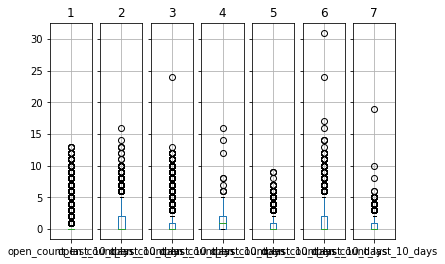

In [ ]:
df.groupby("country_code").boxplot(column=["open_count_last_10_days"], sharey=True, layout=(1, df["country_code"].nunique()))

#### Categorical - Categorical

Similar to above approach, we want to answer the question: How does the distribution compares across categories. We can use **frequency matrix** for this

In [ ]:
freq_matrix = df.groupby(["country_code", "open_flag"]).count()["user_id"].unstack()
freq_matrix

open_flag,0,1
country_code,,
1,26118,2305
2,11222,2652
3,12026,1819
4,4100,2202
5,4344,1192
6,2506,715
7,1767,571


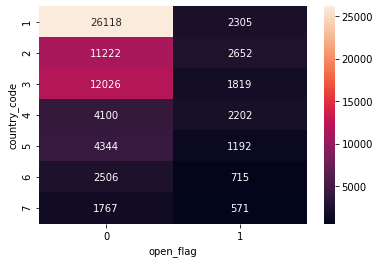

In [ ]:
import seaborn as sns

sns.heatmap(freq_matrix, annot=True, fmt="d")

We will need to **normalize** the numbers to compare across categories, since each of them has different number of total samples. We can either normalize across country code or open flag, depending on which is the given condition.

In [ ]:
freq_matrix = df.groupby(["country_code", "open_flag"]).count()["user_id"].unstack()
country_counts = df["country_code"].value_counts()
open_counts = df["open_flag"].value_counts()

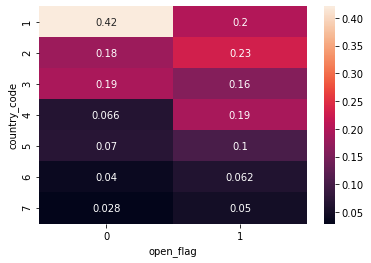

In [ ]:
sns.heatmap(freq_matrix / open_counts, annot=True)

In the chart above, we have normalized over open_flag. We can make some inference from this. For example, given we know an email is not open (`open_flag=0`), it is very likely that the country_code is 1

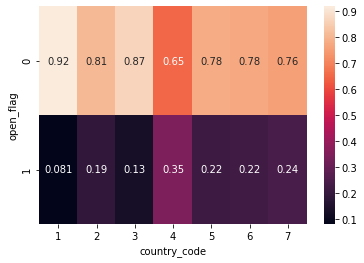

In [ ]:
sns.heatmap(freq_matrix.T / country_counts, annot=True)

We can also normalize over country_code. In this case, the given condition will be `country_code`. For example, if we know country code is 4, it is more likely to have open_flag = 1 compared to other country codes.

### Three and more variables

For more variables, usually we will need some creative ways to visualize them together, such as using color as 1 variable/feature, and x-axis and y-axis as 2 other variables/features.

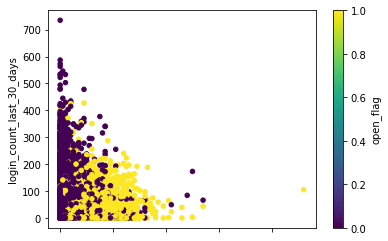

In [10]:
df.plot.scatter(x="open_count_last_30_days", y="login_count_last_30_days", c="open_flag", cmap="viridis")

We can also plot every pair of variables to quickly visualize many features.

Note: `seaborn.pairplot()` is very slow, so don't use it with so many columns and data points

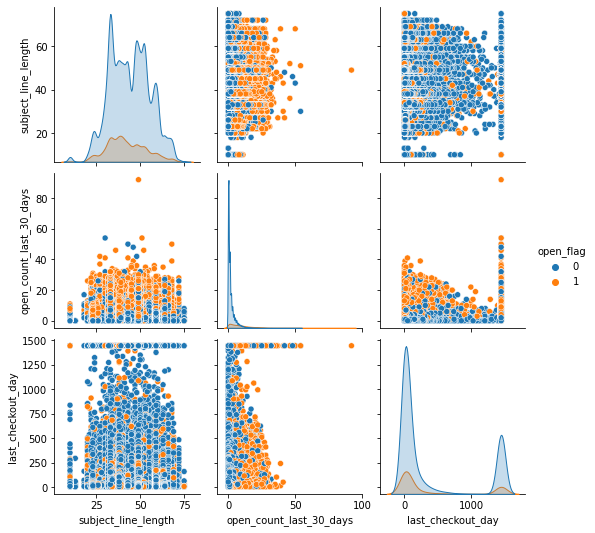

In [24]:
import seaborn as sns

sns.pairplot(df[["subject_line_length", "open_count_last_30_days", "last_checkout_day", "open_flag"]], hue="open_flag")

## Merge data

There are two basic merge methods

- `concat()`: add new rows
- `merge()`: add new columns

### `concat()`

Pandas will stack DataFrames on top of each other. DataFrames don't need to have the same columns. If they don't, the missing values will be NaN (`open_flag` for `test.csv` below)

In [25]:
test_df = pd.read_csv("test.csv")
test_df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [27]:
pd.concat([df, test_df])

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0.0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1.0,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0.0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0.0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,NaN,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,NaN,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,NaN,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,NaN,55968


### `merge()`

Same as above, but now we add more columns (features/variables). We can also specify which column will be used to merge the data

In [28]:
users = pd.read_csv("users.csv")
users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [29]:
pd.merge(df, users, on="user_id")

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0,1.0,1.0,2.0,47.0,@gmail.com
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2,NaN,1.0,0.0,NaN,@yahoo.com
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4,NaN,1.0,0.0,NaN,@hotmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534,NaN,1.0,0.0,NaN,@hotmail.com
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535,1.0,1.0,2.0,30.0,@gmail.com
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,1445,0,0,0,0,0,0,0,0,0,0,73536,NaN,NaN,0.0,NaN,@gmail.com
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,0,0,0,0,0,0,1,73537,1.0,1.0,1.0,38.0,@gmail.com


## Others

- `map()`: apply a function to each value in a series. Use this when you want to apply complex transformations on each value

In [34]:
def square(x):
    return x ** 2

df["subject_line_length"].map(square)           # you can use lambda function here also

0        1936
1        1936
2        2401
3        2401
4        2401
         ... 
73534    1521
73535    1444
73536    1024
73537    1444
73538    1521
Name: subject_line_length, Length: 73539, dtype: int64

- `apply()`: apply a function to each row or column in a Data Frame. Use this when you want to do something with the whole row or column

In [35]:
def product(row):
    return row["subject_line_length"] * row["open_count_last_30_days"]

df.apply(product, axis=1)

0         88
1        396
2        196
3          0
4          0
        ... 
73534     39
73535      0
73536      0
73537    152
73538     78
Length: 73539, dtype: int64